<a href="https://colab.research.google.com/github/SreevishnuAB/ChimpData/blob/main/Network_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install networkx[default] pandas
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 23.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [ ]:
from typing import List, Dict
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
df_wet_season = pd.read_csv("drive/MyDrive/Colab Notebooks/pai_by_pairs_wet_season.csv", dtype="str")
df_dry_season = pd.read_csv("drive/MyDrive/Colab Notebooks/pai_by_pairs_dry_season.csv", dtype="str")

In [ ]:
df_wet_season.loc[:, 'PAI'] = pd.to_numeric(df_wet_season.loc[:, 'PAI'])
df_dry_season.loc[:, 'PAI'] = pd.to_numeric(df_dry_season.loc[:, 'PAI'])

In [ ]:
df_dry_season[df_dry_season['A'] == 'unknown'] # sanity check

,A,B,PAI


In [ ]:
print(df_wet_season.head())
print(df_dry_season.head())

         A        B       PAI
0  alizeti   bingwa  9.520257
1   almasi   bingwa  9.520257
2   baseka    sanaa  0.410552
3   bingwa   samaki  1.280400
4   bingwa  kinanda  1.543825
         A        B       PAI
0  alizeti      jua  6.030787
1   baseka   maisha  2.172857
2   baseka  kinanda  0.822046
3   baseka    wingu  0.796241
4   bingwa    wingu  1.168489


In [ ]:
pai_values_wet_season = list(map(lambda x: list(x), df_wet_season.values))
print(pai_values_wet_season)
pai_values_dry_season = list(map(lambda x: list(x), df_dry_season.values))
print(pai_values_dry_season)

[['alizeti', 'bingwa', 9.520256718812677], ['almasi', 'bingwa', 9.520256718812677], ['baseka', 'sanaa', 0.410551807645736], ['bingwa', 'samaki', 1.2804004919171668], ['bingwa', 'kinanda', 1.5438254138615148], ['bingwa', 'rosa', 0.6472695786161592], ['bingwa', 'kitambi', 1.084311699181398], ['bingwa', 'corona', 0.8400226516599419], ['bingwa', 'mbawa', 0.9681617002182382], ['bonge', 'wingu', 1.347414892835436], ['bonge', 'imba', 1.027476919669375], ['corona', 'baseka', 1.820606403165247], ['corona', 'wingu', 0.9033650579100398], ['corona', 'kitambi', 1.1455639938391404], ['dhahabu', 'imba', 1.209912649998568], ['dhahabu', 'samaki', 1.3914175823199708], ['dhahabu', 'kitambi', 1.014789422857185], ['dhahabu', 'wingu', 1.127334561966827], ['dhahabu', 'bonge', 1.6122038503595215], ['dhahabu', 'corona', 0.8744864685617435], ['dhahabu', 'baseka', 0.5883247262962198], ['dhahabu', 'bingwa', 1.358716250160644], ['dhahabu', 'rosa', 2.023581506642097], ['dhahabu', 'sanaa', 1.1474524429710315], ['eli

In [ ]:
edge_data_wet_season = [(a, b, {"weight": pai}) for a, b, pai in pai_values_wet_season]
edge_data_dry_season = [(a, b, {"weight": pai}) for a, b, pai in pai_values_dry_season]
print(edge_data_wet_season)
print(edge_data_dry_season)

[('alizeti', 'bingwa', {'weight': 9.520256718812677}), ('almasi', 'bingwa', {'weight': 9.520256718812677}), ('baseka', 'sanaa', {'weight': 0.410551807645736}), ('bingwa', 'samaki', {'weight': 1.2804004919171668}), ('bingwa', 'kinanda', {'weight': 1.5438254138615148}), ('bingwa', 'rosa', {'weight': 0.6472695786161592}), ('bingwa', 'kitambi', {'weight': 1.084311699181398}), ('bingwa', 'corona', {'weight': 0.8400226516599419}), ('bingwa', 'mbawa', {'weight': 0.9681617002182382}), ('bonge', 'wingu', {'weight': 1.347414892835436}), ('bonge', 'imba', {'weight': 1.027476919669375}), ('corona', 'baseka', {'weight': 1.820606403165247}), ('corona', 'wingu', {'weight': 0.9033650579100398}), ('corona', 'kitambi', {'weight': 1.1455639938391404}), ('dhahabu', 'imba', {'weight': 1.209912649998568}), ('dhahabu', 'samaki', {'weight': 1.3914175823199708}), ('dhahabu', 'kitambi', {'weight': 1.014789422857185}), ('dhahabu', 'wingu', {'weight': 1.127334561966827}), ('dhahabu', 'bonge', {'weight': 1.6122038

In [ ]:
import numpy as np


def generate_edge_colors(edges):
  color_list = []
  edges.sort()
  for edge in edges:
    color_list.append((0, 0.7, 0.7))
  return color_list

{'alizeti': Text(0.7471303497027834, -0.05937969506428075, 'alizeti'),
 'bingwa': Text(0.4705220356921418, -0.011020829613392508, 'bingwa'),
 'almasi': Text(0.7319589984178583, 0.1204270403913135, 'almasi'),
 'baseka': Text(-0.1029268627980596, 0.5919742654121989, 'baseka'),
 'sanaa': Text(-0.3196886005843688, 0.19053211791242095, 'sanaa'),
 'samaki': Text(0.10971275281568459, -0.03568084614136088, 'samaki'),
 'kinanda': Text(1.0, -0.21987013856883622, 'kinanda'),
 'rosa': Text(-0.1000387208551369, -0.19450341490268316, 'rosa'),
 'kitambi': Text(0.26440611294343647, -0.0921783122034225, 'kitambi'),
 'corona': Text(-0.003984075941184074, 0.23619113352651247, 'corona'),
 'mbawa': Text(-0.39809796137190545, -0.2202683623572902, 'mbawa'),
 'bonge': Text(-0.3154281685568297, 0.43009274658990343, 'bonge'),
 'wingu': Text(-0.12867405403199345, 0.0864530535209613, 'wingu'),
 'imba': Text(0.08040900598958793, 0.22691057068216663, 'imba'),
 'dhahabu': Text(0.02114308088490153, 0.1115772480008027

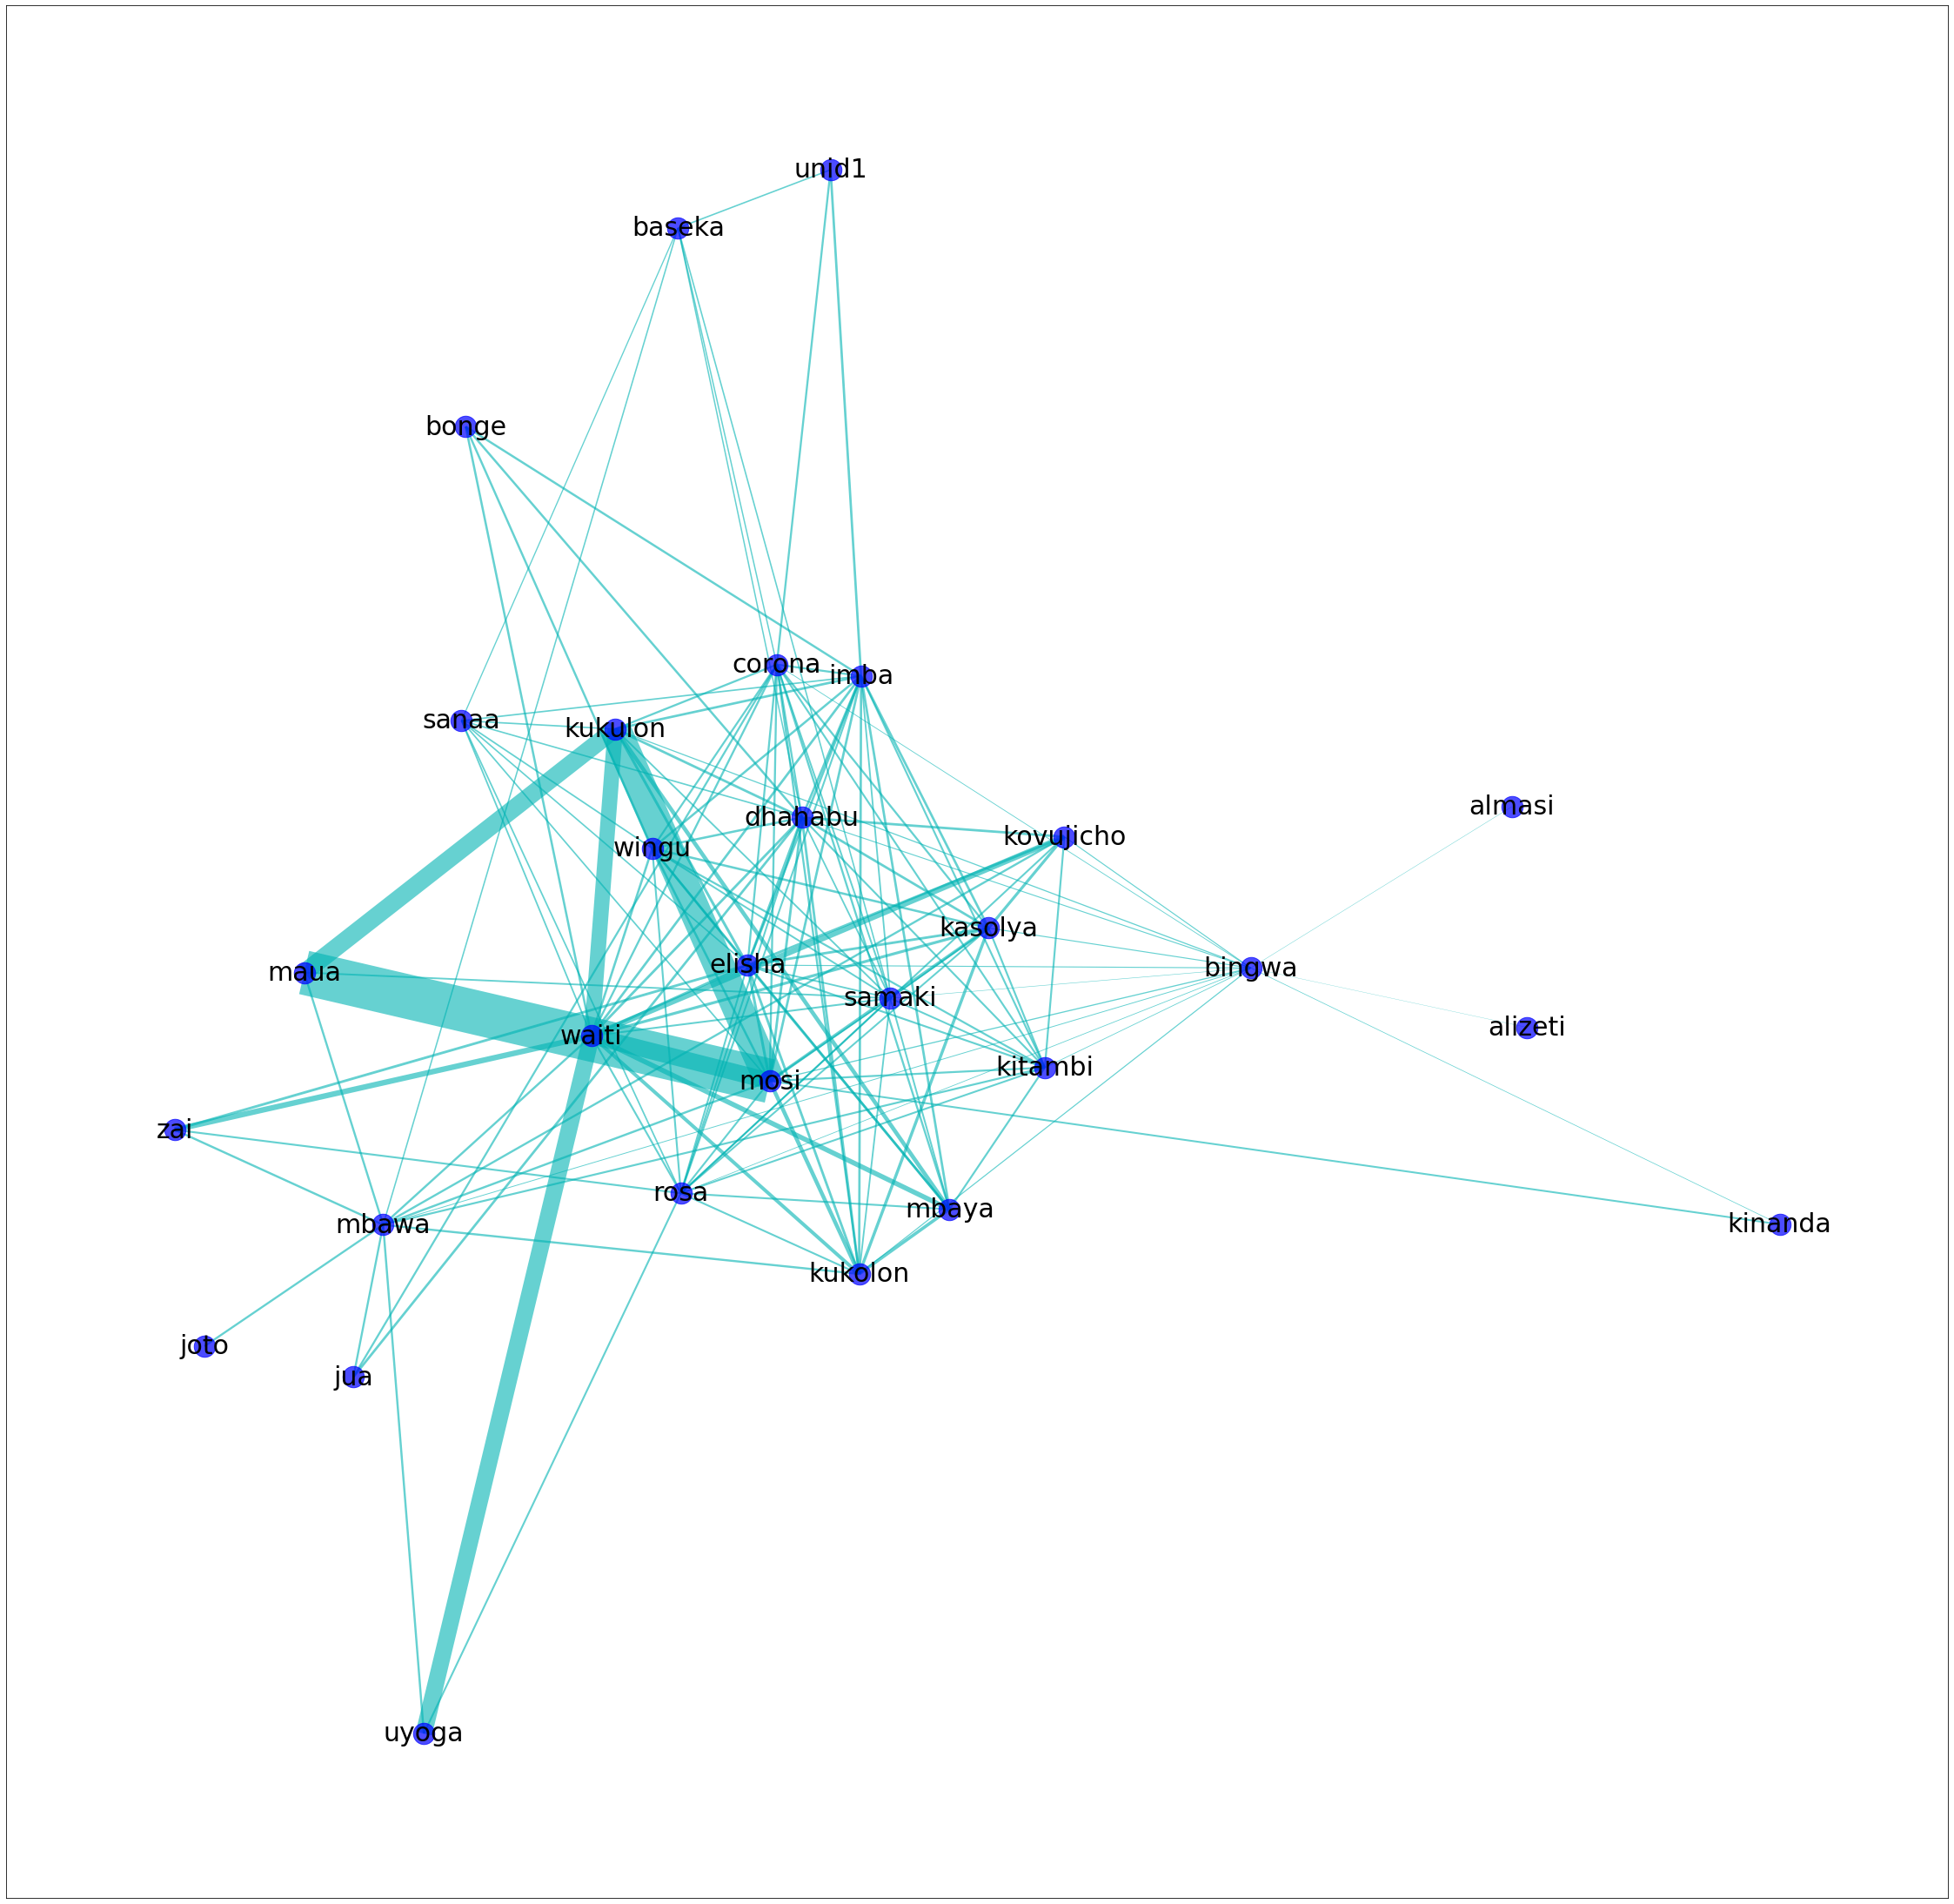

In [ ]:
G_wet_season = nx.Graph()
G_wet_season.add_edges_from(edge_data_wet_season)
pos_wet_season = nx.spring_layout(G_wet_season)

fig, ax = plt.subplots(figsize=(40, 40))

widths_wet_season = nx.get_edge_attributes(G_wet_season, 'weight')
weights_wet_season = list(widths_wet_season.values())

edge_colors_wet_season = generate_edge_colors(weights_wet_season)
weights_wet_season_copy = weights_wet_season
weights_wet_season_copy.sort()
edge_opacity_wet_season = [weight/weights_wet_season_copy[-1] for weight in weights_wet_season]

weight_adjusted_wet_season = list(map(lambda x: x * 2, weights_wet_season))

nx.draw_networkx_nodes(G_wet_season, pos_wet_season, ax=ax,
                       nodelist=G_wet_season.nodes(),
                       node_color='blue',
                       node_size=600,
                       alpha=0.7)

nx.draw_networkx_edges(G_wet_season, pos_wet_season,
                       edgelist = widths_wet_season.keys(),
                       width=weight_adjusted_wet_season,
                       edge_color=edge_colors_wet_season,
                       alpha=0.6)
nx.draw_networkx_labels(G_wet_season, pos=pos_wet_season,
                        labels=dict(zip(G_wet_season.nodes(),G_wet_season.nodes())),
                        font_size=30,
                        font_color='black')
# nx.draw_networkx(G_wet_season, pos=pos_wet_season, ax=ax, font_size=30, edge_color=edge_colors_wet_season)


{'alizeti': Text(-0.09974176888244685, 1.0, 'alizeti'),
 'jua': Text(0.15764209787743455, 0.48857653444957705, 'jua'),
 'baseka': Text(0.6232456119262506, 0.056031717029617095, 'baseka'),
 'maisha': Text(0.8823407595058402, 0.4082059151103512, 'maisha'),
 'kinanda': Text(-0.022355954303387406, 0.39136419944132517, 'kinanda'),
 'wingu': Text(-0.3434646685628157, 0.029161448643557967, 'wingu'),
 'bingwa': Text(-0.6429948660874358, -0.4101797907505834, 'bingwa'),
 'bonge': Text(-0.22251773387689466, -0.14810469517666136, 'bonge'),
 'sanaa': Text(-0.1603723064375568, -0.3815339898627179, 'sanaa'),
 'imba': Text(-0.03143507794725255, -0.2598231166937111, 'imba'),
 'kitambi': Text(-0.25100103986433864, -0.5561937301166483, 'kitambi'),
 'mbaya': Text(-0.059193148078958736, -0.12650707579618464, 'mbaya'),
 'corona': Text(-0.44051651901990746, -0.19531834552374192, 'corona'),
 'mbawa': Text(0.31898715293284036, 0.40495823915773194, 'mbawa'),
 'rosa': Text(0.022248531597877798, -0.70519745397856

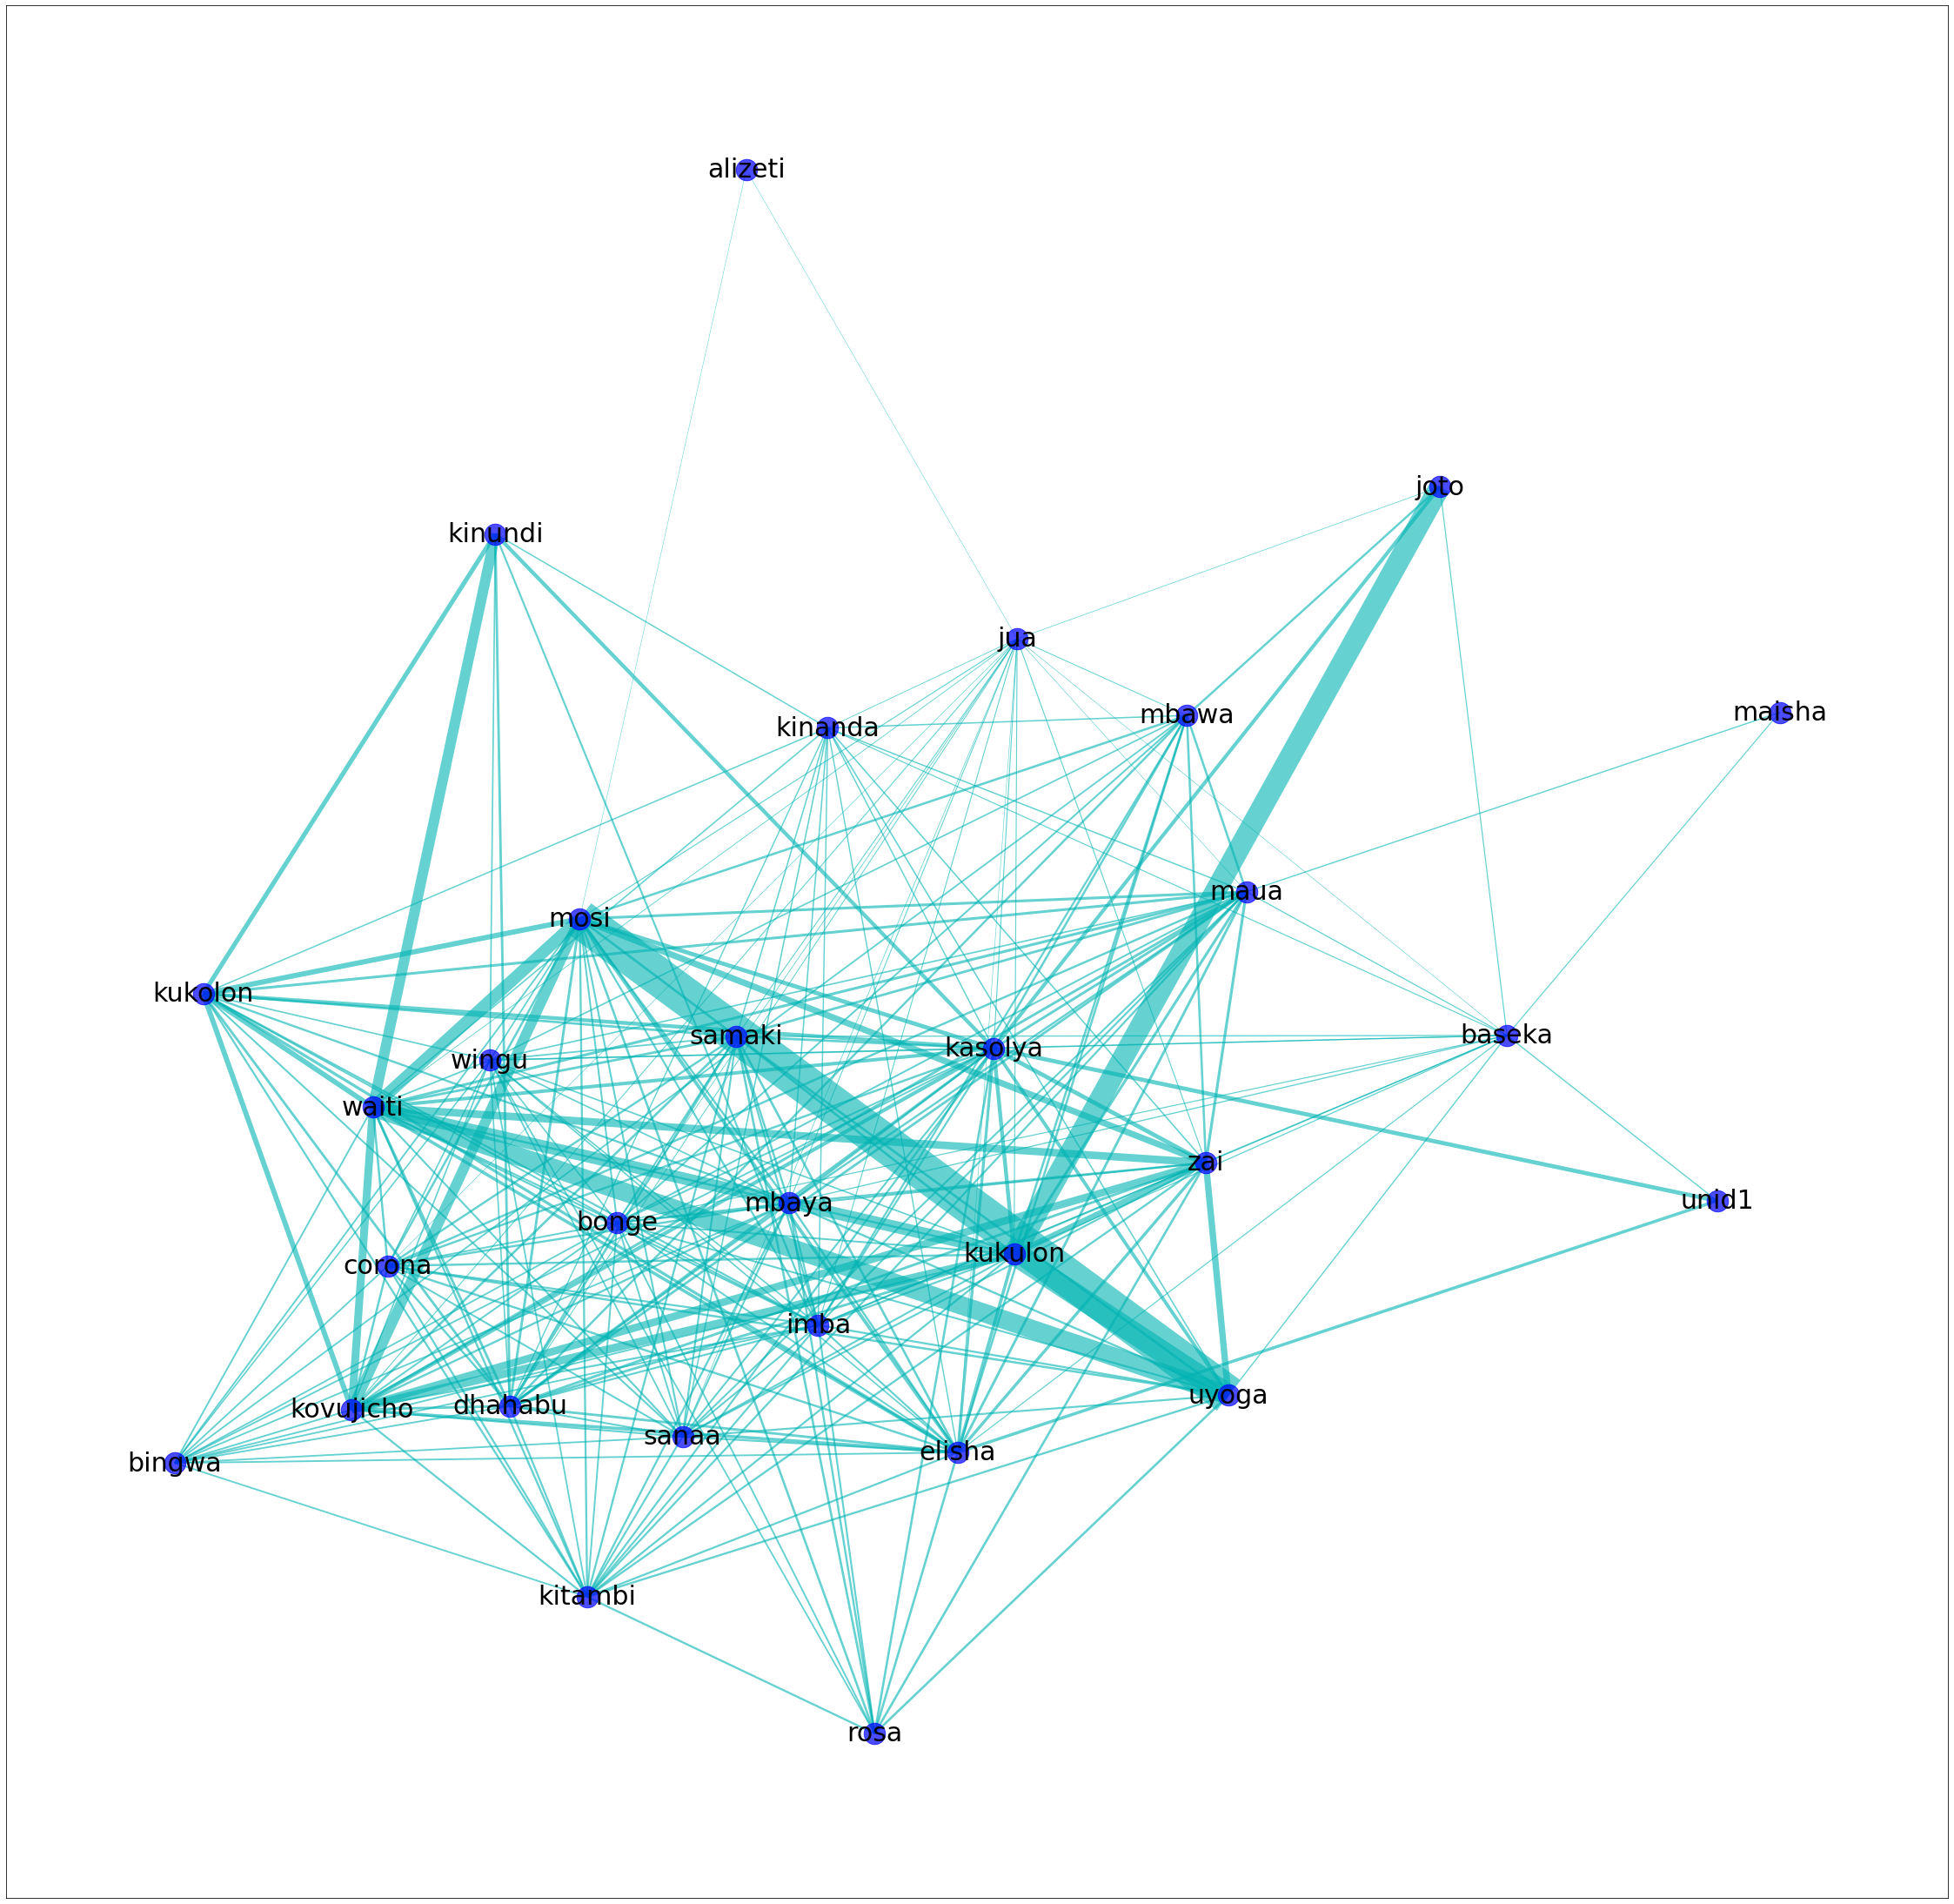

In [ ]:
G_dry_season = nx.Graph()
G_dry_season.add_edges_from(edge_data_dry_season)
pos_dry_season = nx.spring_layout(G_dry_season)

fig, ax = plt.subplots(figsize=(40, 40))

widths_dry_season = nx.get_edge_attributes(G_dry_season, 'weight')
weights_dry_season = list(widths_dry_season.values())

edge_colors_dry_season = generate_edge_colors(weights_dry_season)
weights_dry_season_copy = weights_dry_season
weights_dry_season_copy.sort()
edge_opacity_dry_season = [weight/(weights_dry_season_copy[-1] * 2) for weight in weights_dry_season]
weight_adjusted_dry_season = list(map(lambda x: x * 2, weights_dry_season))

nx.draw_networkx_nodes(G_dry_season, pos_dry_season, ax=ax,
                       nodelist=G_dry_season.nodes(),
                       node_color='blue',
                       node_size=600,
                       alpha=0.7)

nx.draw_networkx_edges(G_dry_season, pos_dry_season,
                       edgelist = widths_dry_season.keys(),
                       width=weight_adjusted_dry_season,
                       edge_color=edge_colors_dry_season,
                       alpha=0.6)
nx.draw_networkx_labels(G_dry_season, pos=pos_dry_season,
                        labels=dict(zip(G_dry_season.nodes(), G_dry_season.nodes())),
                        font_size=30,
                        font_color='black')

In [ ]:
nx.clustering(G_wet_season)

{'alizeti': 0,
 'bingwa': 0.4666666666666667,
 'almasi': 0,
 'baseka': 0.3333333333333333,
 'sanaa': 0.75,
 'samaki': 0.6583333333333333,
 'kinanda': 1.0,
 'rosa': 0.5916666666666667,
 'kitambi': 0.717948717948718,
 'corona': 0.575,
 'mbawa': 0.19696969696969696,
 'bonge': 1.0,
 'wingu': 0.7564102564102564,
 'imba': 0.6416666666666667,
 'dhahabu': 0.5620915032679739,
 'elisha': 0.6617647058823529,
 'kasolya': 0.8333333333333334,
 'kukolon': 0.7727272727272727,
 'mbaya': 0.8222222222222222,
 'zai': 0.6666666666666666,
 'kovujicho': 0.7857142857142857,
 'waiti': 0.5163398692810458,
 'joto': 0,
 'jua': 0.3333333333333333,
 'kukulon': 0.6909090909090909,
 'maua': 0.6666666666666666,
 'mosi': 0.5955882352941176,
 'unid1': 0.6666666666666666,
 'uyoga': 0.6666666666666666}

In [ ]:
nx.clustering(G_dry_season)

{'alizeti': 1.0,
 'jua': 0.7210526315789474,
 'baseka': 0.6166666666666667,
 'maisha': 1.0,
 'kinanda': 0.7583333333333333,
 'wingu': 0.7619047619047619,
 'bingwa': 0.9333333333333333,
 'bonge': 0.7865612648221344,
 'sanaa': 0.8523809523809524,
 'imba': 0.73,
 'kitambi': 0.8578947368421053,
 'mbaya': 0.7944664031620553,
 'corona': 0.9150326797385621,
 'mbawa': 0.7692307692307693,
 'rosa': 0.9272727272727272,
 'samaki': 0.8142857142857143,
 'dhahabu': 0.8008658008658008,
 'maua': 0.7662337662337663,
 'elisha': 0.7282608695652174,
 'kasolya': 0.6410256410256411,
 'kukolon': 0.8833333333333333,
 'zai': 0.7953216374269005,
 'unid1': 1.0,
 'kovujicho': 0.9122807017543859,
 'waiti': 0.8008658008658008,
 'joto': 0.9,
 'uyoga': 0.819047619047619,
 'kinundi': 0.9523809523809523,
 'kukulon': 0.7714285714285715,
 'mosi': 0.7402597402597403}

In [ ]:
nx.average_clustering(G_wet_season)

0.583747788159553

In [ ]:
nx.average_clustering(G_dry_season)

0.8249906802913266